In [1]:
# import pandas module 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# making dataframe 
answers_df = pd.read_csv("./Answers.csv", encoding = "ISO-8859-1") 
questions_df = pd.read_csv("./Questions.csv", encoding = "ISO-8859-1")
tags_df = pd.read_csv("./Tags.csv", encoding = "ISO-8859-1")

In [3]:
answers_df.head(5)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


In [4]:
questions_df.head(5)

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [6]:
# initial EDA, data cleaning
# 1) look at distribution of scores on the answers
# --- join to questions ---
# distribution of max answer score for each question
# distribution of # responses per question

In [7]:
scores = answers_df['Score']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e3b57f040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e3b57f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e3bd6ecd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e3b57fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e3b57fe50>],
 'means': []}

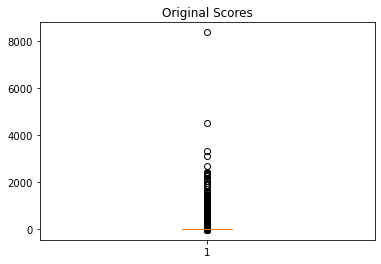

In [8]:
# an initial look at the scores makes it clear that there are some very extreme values...
fig1, ax1 = plt.subplots()
ax1.set_title('Original Scores')
ax1.boxplot(scores)

In [9]:
# median is 1, 75% is 3, but the max is 8384. let's see where it all goes wrong
scores.describe()

count    987122.000000
mean          3.028437
std          21.263246
min         -38.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        8384.000000
Name: Score, dtype: float64

In [10]:
# using the IQR method to remove outliers. Instead of removing, will just replace with the limit
# IE) Scores greater than upper_limit will just be replaced with upper limit, same with lower limit.
# https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce

In [11]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
print(IQR)

3.0


In [12]:
scores_upper_limit = scores.quantile(0.75) + 3 * IQR
scores_lower_limit = scores.quantile(0.25) - 3 * IQR

In [37]:
answers_df[answers_df['Score'] > scores_upper_limit] = scores_upper_limit
answers_df[answers_df['Score'] < scores_lower_limit] = scores_lower_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e35e1c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e35ead220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e35e1c8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e35e4adc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e35e530d0>],
 'means': []}

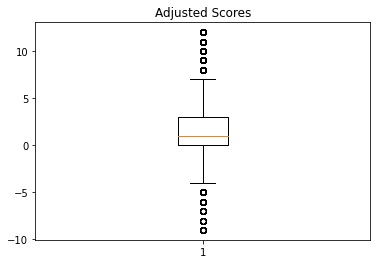

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Adjusted Scores')
ax1.boxplot(scores)

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

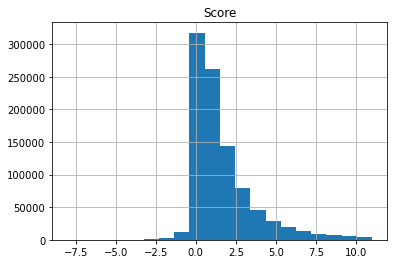

In [39]:
# Histogram view of the general distribution of the Score trait, among the answers
answers_df_filtered.hist(column="Score", bins=20)

In [70]:
# utility function, to just get the slice of the answers_df which matches the question ID
def get_question_answer_info(question_id):
    relevant_answers = answers_df.query(f"ParentId == {question_id}")
    scores = relevant_answers['Score']
    num_answers = len(scores)
    highest_score = np.max(scores)
    if num_answers == 0:
        highest_score = 0

    return highest_score, num_answers

In [31]:
# list(a.index)
# a.loc[1]['Tag']
# a.loc[1, ['Tag']] = 'test'
# some_df.insert(4,"bcd", "1")

'osx'

In [88]:
# first insert empty columns, which we will rewrite shortly
questions_df.insert(6, "highest_answer_score", 0)
questions_df.insert(7, "num_answers", 0)

In [91]:
index = questions_df.index
for row_index in index:
    if row_index % 10000 == 0:
        print(row_index)
    question = questions_df.loc[row_index]
    question_id = question['Id']
    highest_score, num_answers = get_question_answer_info(question_id)
    questions_df.loc[row_index, ['highest_answer_score']] = highest_score
    questions_df.loc[row_index, ['num_answers']] = num_answers

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000


In [92]:
questions_df

,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,4,3
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,4,1
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8,7
...,...,...,...,...,...,...,...,...
607277,40143190,333403.0,2016-10-19T23:36:01Z,1,How to execute multiline python code from a ba...,<p>I need to extend a shell script (bash). As ...,5,2
607278,40143228,6662462.0,2016-10-19T23:40:00Z,0,How to get google reCaptcha image source using...,<p>I understood that reCaptcha loads a new fra...,0,0
607279,40143267,4064680.0,2016-10-19T23:44:07Z,0,Updating an ManyToMany field with Django rest,<p>I'm trying to set up this API so I can use ...,0,0
607280,40143338,7044980.0,2016-10-19T23:52:27Z,2,Most possible pairs,"<p>Given a list of values, and information on ...",0,0


In [93]:
questions_df.to_csv("processed_questions.csv")

array([[<AxesSubplot:title={'center':'highest_answer_score'}>]],
      dtype=object)

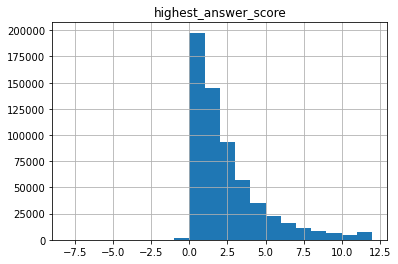

In [94]:
questions_df.hist(column="highest_answer_score", bins=20)

array([[<AxesSubplot:title={'center':'num_answers'}>]], dtype=object)

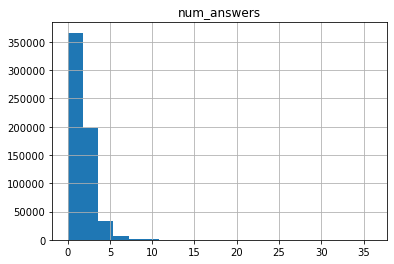

In [95]:
questions_df.hist(column="num_answers", bins=20)